##### __c)__  Determine si el supuesto de normalidad multivariada tiene asidero estadístico. Justifique

In [2]:
df<- read.table('diag2010.txt',header=TRUE)

In [3]:
df

PSU,LC,Mate,NEM,OC,OH,Buenas,Malas,Omitidas,Nota,Calculo,R1,R2,R3,R4
<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
669.80,710,678,620,677,0,29,6,5,731,731,69.2,92.3,62.5,50.0
667.40,674,756,496,684,0,31,1,8,762,762,84.6,53.8,87.5,100.0
693.80,659,718,682,684,0,27,6,7,712,712,84.6,46.2,75.0,66.7
669.65,576,682,723,668,0,25,10,5,683,683,61.5,61.5,50.0,83.3
666.55,582,682,723,625,0,33,6,1,769,769,84.6,84.6,75.0,83.3
661.20,667,718,558,652,0,30,5,5,743,743,84.6,61.5,75.0,83.3
677.60,732,669,661,649,0,18,6,16,626,626,46.2,38.5,37.5,66.7
687.10,614,718,702,657,0,29,9,2,724,724,69.2,69.2,75.0,83.3
676.20,732,669,661,635,0,29,5,6,733,733,61.5,76.9,75.0,83.3


In [15]:
chisplot <- function(x) {
if (!is.matrix(x)) stop("x is not a matrix")
    ### determine dimensions
    n <- nrow(x)
    p <- ncol(x)
    #
    xbar <- apply(x, 2, mean)
    S <- var(x)
    S <- solve(S)
    index <- (1:n)/(n+1)
    #
    xcent <- t(t(x) - xbar)
    di <- apply(xcent, 1, function(x,S) x %*% S %*% x,S)
    #
    quant <- qchisq(index,p)
    #print(quant)
    #print(di)
    plot(quant, sort(di), ylab = "Ordered distances",
    xlab = "Chi-square quantile", lwd=2,pch=1)
}

In [13]:
aux<-data.frame(
"Mate"=df$Mate,
"Calculo"=df$Calculo)
delete.na <- function(df, n=0) {
 df[rowSums(is.na(df)) <= n,]
}
aux<-delete.na(aux)

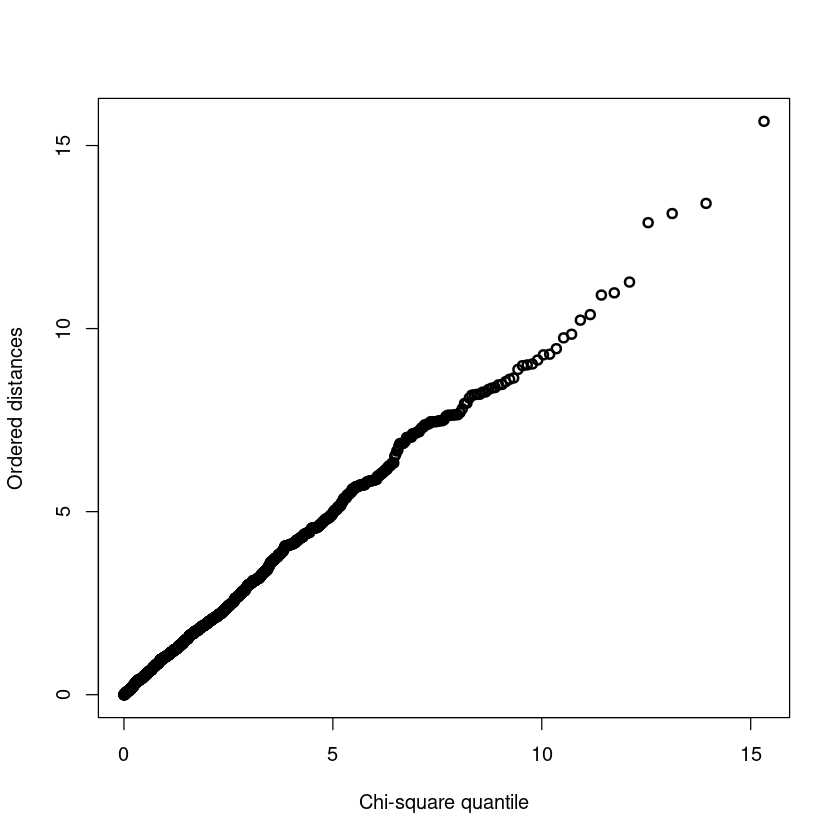

In [16]:
DATA<-as.matrix(aux)
chisplot(DATA)

##### __mediante el chisplot podemos concluir que si hay sustento estadistico para creer que los datos tiene una distribución normal bivariada__

##### __g)__ El instrumento consiste en 40 preguntas clasificadas en 4 categorías. Estas categorías tienen relación con los 4 cursos remediales que se ofrece a aquellos estudiantes que obtienen un puntaje menor a 620 puntos. El porcentaje de respuestas acertadas en cada categoría se encuentra en la base de datos con los nombres R1, R2, R3 y R4. ¿Es razonable asumir una distribución normal multivariada para modelar las variables R1, R2, R3 y R4?

In [19]:
aux2<-data.frame(
"R1"=df$R1,
"R2"=df$R2,
"R3"=df$R3,
"R4"=df$R4)
aux2<-delete.na(aux2)

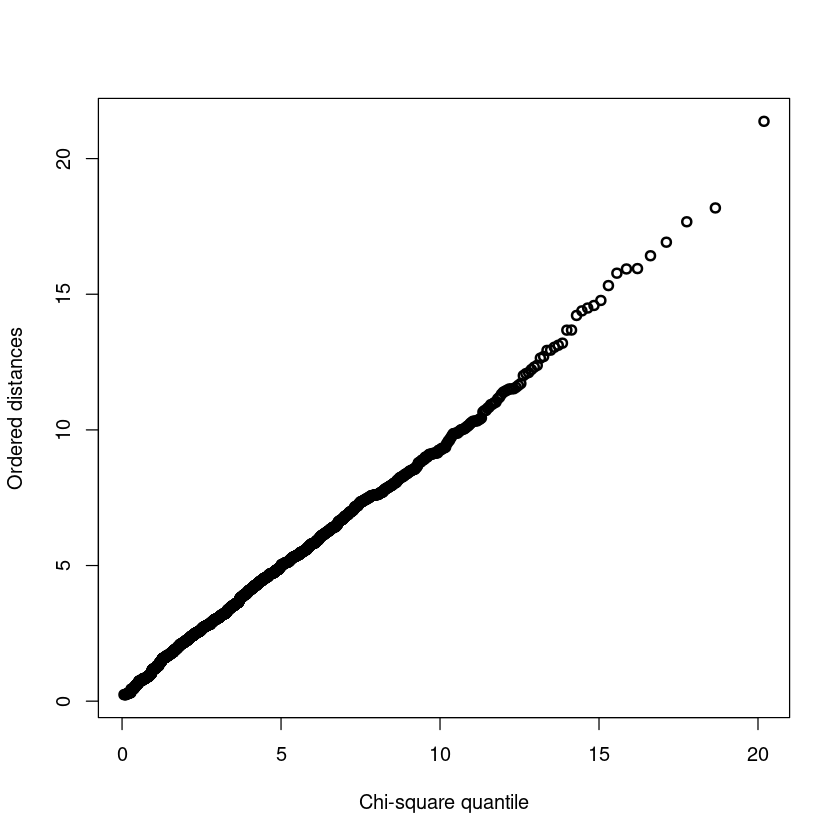

In [20]:
DATAg<-as.matrix(aux2)
chisplot(DATAg)

__al igual que en c) podemos ver por el chisplot que si es racional asumir la existencia de una distribución normal multivariada__

##### __h)__ Use el test $T^2$ de Hotelling para docimar la hipótesis de igualdad de las medias de las variables PSU y la prueba de diagnostico aplicada en la USM el añoo 2010 versus una hipótesis alternativa bilateral. Use $\alpha = 0.05$

In [23]:
library(mvtnorm)
library(ICS)
library(ICSNP)

In [35]:
aux3<-data.frame(
"PSU"=df$PSU,
"CALCULO"=df$Calculo)
aux3<-delete.na(aux3)

In [36]:
HotellingsT2(aux3,test="f", mu = c(0,0))


	Hotelling's one sample T2-test

data:  aux3
T.2 = 370774, df1 = 2, df2 = 2179, p-value < 2.2e-16
alternative hypothesis: true location is not equal to c(0,0)


__Con $\alpha=0.05$ no es concluyente el test.__